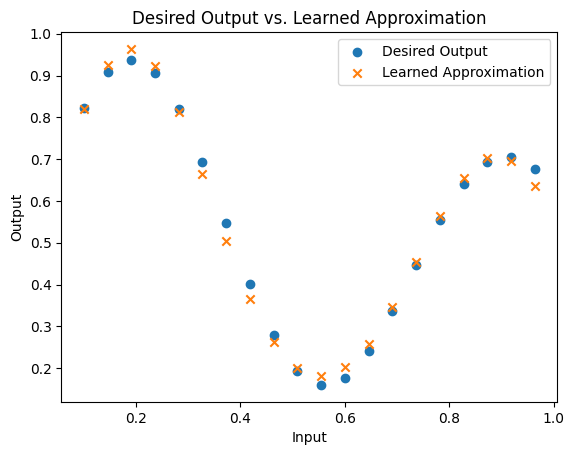

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from random import random

# Initialize parameters
c1, r1 = 0.19, 0.15  # center and radius of the first RBF
c2, r2 = 0.89, 0.15  # second RBF
w1 = random()       # Weight associated with the first RBF
w2 = random()       # second RBF
w0 = random()       # bias weight
alpha = 0.01        # learning rate

# Generate input data
x = np.arange(0.1, 1.0, 1/22)  # input data
desired_output = (1 + 0.6 * np.sin(2 * np.pi * x / 0.7) + 0.3 * np.sin(2 * np.pi * x))/2  # desired output

# Set the number of epochs
num_epochs = 1000

# Lists to store errors for plotting
errors = []

# Training loop
for epoch in range(num_epochs):
    total_error = 0

    for i in range(len(x)):
        # Compute RBF outputs
        phi1 = np.exp(-(x[i] - c1)**2 / (2 * r1**2))  # output of the first RBF
        phi2 = np.exp(-(x[i] - c2)**2 / (2 * r2**2))  # second RBF

        # Calculate network output
        network_output = w1 * phi1 + w2 * phi2 + w0  # Neural network output

        # Compute error
        error = (desired_output[i] - network_output)**2

        # Update weights using the perceptron training algorithm
        delta_w1 = alpha * phi1 * (desired_output[i] - network_output)  # Update weight w1
        delta_w2 = alpha * phi2 * (desired_output[i] - network_output)  # Update weight w2
        delta_w0 = alpha * (desired_output[i] - network_output)          # Update weight w0

        w1 += delta_w1  # Update weight w1
        w2 += delta_w2  # Update weight w2
        w0 += delta_w0  # Update weight w0


# Plot the learned approximation
learned_output = [w1 * np.exp(-(xi - c1)**2 / (2 * r1**2)) + w2 * np.exp(-(xi - c2)**2 / (2 * r2**2)) + w0 for xi in x]
plt.scatter(x, desired_output, label='Desired Output')
plt.scatter(x, learned_output, label='Learned Approximation', marker='x')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Desired Output vs. Learned Approximation')
plt.legend()
plt.show()
